In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X= np.random.uniform(size =(500, 3))
# generam o matrice cu 500 randuri si 3 coloane cu valori intre 0 si 1

In [4]:
X

array([[0.3681051 , 0.12127364, 0.63130054],
       [0.74805423, 0.89011777, 0.09179132],
       [0.05061641, 0.58128276, 0.91999319],
       ...,
       [0.00765114, 0.11052344, 0.81861387],
       [0.85740096, 0.79721174, 0.48464917],
       [0.15952635, 0.63154815, 0.54755734]])

No handles with labels found to put in legend.


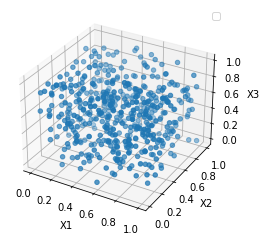

In [6]:
# am reprezentat datele in redim 3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.legend()
plt.show()

In [7]:
# utilizam algoritmul PCA si reducem la 2 coloane matricea
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [8]:
pca.fit(X)

PCA(n_components=2)

In [9]:
pca_X = pca.transform(X)

In [10]:
pca_X

array([[-3.67563901e-01, -1.41170093e-01],
       [ 6.22190539e-01,  5.46890870e-02],
       [-4.26124889e-01,  4.44939442e-01],
       [-7.58054225e-02, -5.29990337e-01],
       [ 2.33725812e-01, -3.27176287e-01],
       [-1.46989315e-01, -4.51204321e-01],
       [-1.78570524e-01,  5.61736029e-01],
       [-4.16174833e-01, -2.08460491e-01],
       [ 5.82056262e-01,  3.09458119e-01],
       [-7.45354549e-02, -1.22311728e-01],
       [-1.82174956e-01, -1.97070276e-01],
       [-4.08142780e-01,  1.80951040e-01],
       [ 8.02673314e-02, -5.06653370e-01],
       [-2.81796620e-01,  3.03441292e-01],
       [-4.33432734e-01,  2.59213781e-01],
       [-1.20758567e-01,  2.67274777e-01],
       [ 2.85756505e-01,  1.08679698e-01],
       [ 4.22613258e-01,  2.17007844e-01],
       [-7.91155903e-02, -3.85278270e-01],
       [ 5.36970525e-02, -5.10691445e-02],
       [ 7.66373158e-02,  2.43644047e-01],
       [-1.35763554e-01, -3.25591006e-01],
       [-3.27845347e-01, -6.77754623e-02],
       [-7.

No handles with labels found to put in legend.


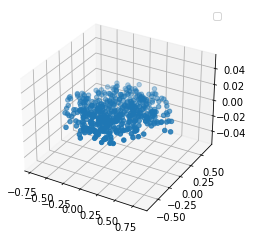

In [15]:
# reprezentam aceasta matrice in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.scatter(pca_X[:, 0], pca_X[:, 1], np.zeros(len(pca_X)))
plt.legend()
plt.show()

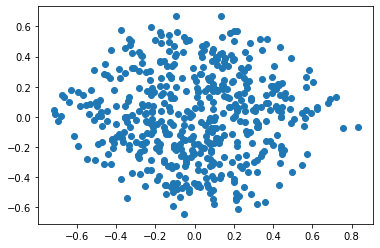

In [16]:
# vizualizam  graficul in 2D
plt.scatter(pca_X[:,0],pca_X[:, 1])

In [14]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
# ascundem coloana target
X = df.drop(['target'], axis=1).values

In [18]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [20]:
pca = PCA()
pca.fit(X)

PCA()

In [21]:
# 
pca.explained_variance_ratio_

array([7.47564199e-01, 1.50370221e-01, 8.45968470e-02, 1.62159604e-02,
       3.84085658e-04, 2.81234229e-04, 2.28993383e-04, 9.98328415e-05,
       7.72143117e-05, 5.87402295e-05, 5.02927817e-05, 4.09679747e-05,
       3.14113086e-05])

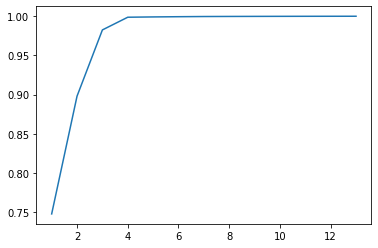

In [23]:
# suma cumulativa pentru 14 valori pentru a vizualiza graficul si pastra informatia 
cumsum = np.cumsum(pca.explained_variance_ratio_)
xi = range(1, 14)
plt.plot(xi, cumsum)

In [24]:
# am luat 3 componente pentru a reduce matrice
pca = PCA(n_components=3)
pca.fit(X)
pca_X = pca.transform(X)

No handles with labels found to put in legend.


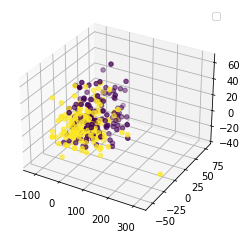

In [25]:
y = df['target'].values
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.scatter(pca_X[:, 0], pca_X[:, 1], pca_X[:, 2], c=y)
plt.legend()
plt.show()

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [51]:
# lda = LinearDiscriminantAnalysis(n_components=2)
# lda.fit(X, y)

In [53]:
X = df[['chol','trestbps']].values

In [54]:
from sklearn.manifold import TSNE

In [55]:
tsne = TSNE()

In [56]:
X_embeded = tsne.fit_transform(X)

c:\users\clasa215b_nt17\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

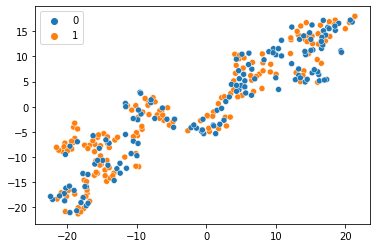

In [57]:
sns.scatterplot(X_embeded[:, 0], X_embeded[:, 1], hue=y)

c:\users\clasa215b_nt17\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

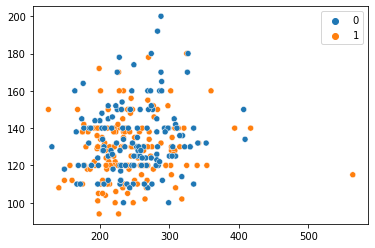

In [58]:
sns.scatterplot(X[:, 0], X[:, 1], hue=y)

In [52]:
X

,chol,trestbps
0,233,145
1,250,130
2,204,130
3,236,120
4,354,120
...,...,...
298,241,140
299,264,110
300,193,144
301,131,130
